# Random Walker

Here we setup, run and plot a two-dimensional random walker path.

In [1]:
using ClimateModels, Pkg, Plots, CSV, DataFrames

## Formulate Model

This simple model steps randomly, `N` times, on a `x,y` plane starting from `0,0`.

In [2]:
function RandomWalker(x)
    #model run
    N=10000
    m=zeros(N,2)
    [m[i,j]=m[i-1,j]+rand((-1,1)) for j in 1:2, i in 2:N]

    #output to file
    df = DataFrame(x = m[:,1], y = m[:,2])
    fil=joinpath(x.folder,string(x.ID),"RandomWalker.csv")
    CSV.write(fil, df)

    return m
end

RandomWalker (generic function with 1 method)

## Setup And Run Model

- `ModelConfig` defines the model into data structure `m`
- `setup` prepares the model to run in a temporary folder
- `launch` runs the `RandomWalker` model which writes results to file

_Note: `RandomWalker` returns results also directly as an Array, but this is generally not an option for most, larger, models_

In [3]:
m=ModelConfig(model=RandomWalker)
setup(m)
xy=launch(m);

## Plot Results

Afterwards, one often uses model output for further analysis. Here we plot the random walker path from the `csv` output file.

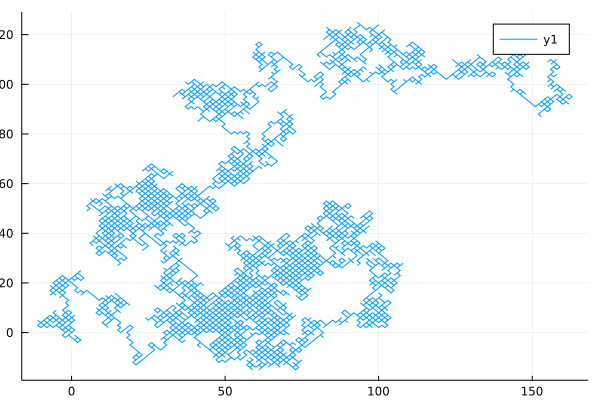

In [4]:
fil=joinpath(m.folder,string(m.ID),"RandomWalker.csv")
output = CSV.File(fil) |> DataFrame
img=plot(output.x,output.y,frmt=:png)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*